# Case study : Banking Loan

Problem statement:

Loan-providing companies find it difficult to provide loans and to identify the defaulters.

Risks: 
Approving loans to those who do not pay leads to financial loss.
Not approving loans to those who are likely to pay back lead to business loss.

Scenarios:
1. Client with payment difficulties: late payment made more than x days on at least one of the first installments y of the loan.
2. All other cases: payments made on time.

Status of loan :
    1.Approved: The Company has approved the loan application
    2.Cancelled: The client canceled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
    3.Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
    4.Unused offer:  Loan has been canceled by the client but at different stages of the process.


#### Importing the libraries.


In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Cleaning 

### Data Types 

In [3]:
# Read the data file application_data.csv 

inp0=pd.read_csv("application_data.csv")


#### From the info() command we can see how many rows, columns and thier data types.
Columns: 122 entries
Rows: 307511
dtypes: float64(65), int64(41), object(16)  

In [4]:
# read the dataframe of application_data
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Categorical  data type 
1. 16 coloumns from the given application_data.csv are defined as Categorical data type

In [5]:
#we get the categorical data type from collecting only with 'object' as data type from data frame for better analysis
cat_col=inp0.select_dtypes("object")
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

#### Numerical Data type
we see the data frame has two data types of numerical 
1. integer
2. float

Based on that we can check how many columns are defined as integer and float

In [6]:
#we get the numerical data type from collecting only with 'int' as data type from data frame for better analysis
num_int=inp0.select_dtypes("int64")
num_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   SK_ID_CURR                   307511 non-null  int64
 1   TARGET                       307511 non-null  int64
 2   CNT_CHILDREN                 307511 non-null  int64
 3   DAYS_BIRTH                   307511 non-null  int64
 4   DAYS_EMPLOYED                307511 non-null  int64
 5   DAYS_ID_PUBLISH              307511 non-null  int64
 6   FLAG_MOBIL                   307511 non-null  int64
 7   FLAG_EMP_PHONE               307511 non-null  int64
 8   FLAG_WORK_PHONE              307511 non-null  int64
 9   FLAG_CONT_MOBILE             307511 non-null  int64
 10  FLAG_PHONE                   307511 non-null  int64
 11  FLAG_EMAIL                   307511 non-null  int64
 12  REGION_RATING_CLIENT         307511 non-null  int64
 13  REGION_RATING_CLIENT_W_CITY  

In [7]:
#we get the numerical data type from collecting only with 'float' as data type from data frame for better analysis
num_float=inp0.select_dtypes("float64")
num_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   OWN_CAR_AGE                   104582 non-null  float64
 7   CNT_FAM_MEMBERS               307509 non-null  float64
 8   EXT_SOURCE_1                  134133 non-null  float64
 9   EXT_SOURCE_2                  306851 non-null  float64
 10  EXT_SOURCE_3                  246546 non-null  float64
 11  APARTMENTS_AVG                151450 non-null  float64
 12  BASEMENTAREA_AVG              127568 non-nul

In [8]:
#describe the dataframe 
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
#shape of the dataframe
inp0.shape

(307511, 122)

### Impute/Remove missing values 

In [10]:
#we will check for the null values count , As it's difficult to see all columns and thier values to determine 
#Thus,we will check the null values with percentage for better under analysis
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
#checking null values with percentage for better understanding
null_values_per=inp0.isnull().sum()/len(inp0)*100

In [12]:
#check null values are greater than 40 percent 
null_values_per[null_values_per>40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

###### we see there are columns with greater than 40 % of null values and we can drop these columns , 
###### which will remove the irregularities of data frame for better analysis

In [13]:
#how many columns that are 40% of null values
len(null_values_per[null_values_per>40])

49

In [14]:
#Droping the 49 columns that are having 40% of null values
max_null_values=null_values_per[null_values_per>40]
inp1=inp0.drop(columns=max_null_values.index)

In [15]:
#checking the shape of the new data frame after dropping columns
inp1.shape

(307511, 73)

In [16]:
#Again we will check null values percent with below 20 %
null_values_per[null_values_per<=20]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 72, dtype: float64

#### As there are null values with less than 20% . From the above we see few columns with 13% null values and 19% with one column. we need to analyse and fix the null values .

In [17]:
min_null_vals=null_values_per[(null_values_per<=20) & (null_values_per>0)].sort_values()
min_null_vals

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
dtype: float64

#### understanding the 13% null value columns
AMT_REQ_CREDIT_BUREAU_QRT     
AMT_REQ_CREDIT_BUREAU_HOUR    
AMT_REQ_CREDIT_BUREAU_DAY     
AMT_REQ_CREDIT_BUREAU_WEEK    
AMT_REQ_CREDIT_BUREAU_MON     
AMT_REQ_CREDIT_BUREAU_YEAR    

In [18]:
#checking thier data types
min_null_vals[10:16].dtype

dtype('float64')

In [19]:
#checking the values of each column
inp1[min_null_vals[10:16].index]

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.0,1.0,0.0,0.0,1.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# By describing the column we can see most of the values are with 0.0 as thier mean 
inp1.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [21]:
# we will try to understand are they same for other too columns by ploting box plot
cols_null_13 =inp1[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR']]

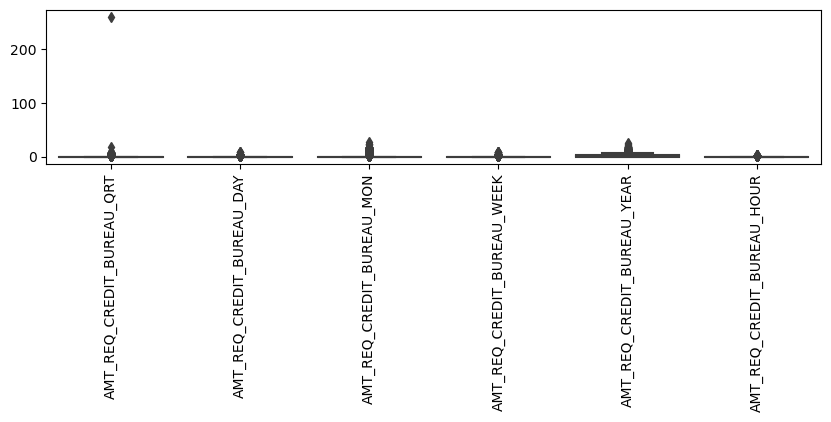

In [22]:
#Box plot for understanding the 13% null values of columns
plt.figure(figsize=[10,2])
sns.boxplot(data=cols_null_13)
plt.xticks(rotation=90)
plt.show()

Based on the box plot we can see the most of data are skewed and lies within 0 the interquartile range and median. 
Thus , we can come to conculsion that we can impute the null values with 0.0 .

#### Futher understanding the 13% null values columns before with imputing 0.0

In [23]:
#checking the % of most rows 
inp1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [24]:
#checking the % of most rows
inp1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [25]:
#checking the % of most rows
inp1.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
23.0    0.000004
27.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [26]:
#checking the % of most rows
inp1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
8.0      0.000026
7.0      0.000026
261.0    0.000004
19.0     0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [27]:
#checking the % of most rows
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [28]:
#checking the % of most rows
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
25.0    0.000004
23.0    0.000004
22.0    0.000004
21.0    0.000004
20.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

####  Based on the above results we can finally see most of the coloumns are with 0.0 values at higher percentage.

### Fixing the 13 % null values

In [29]:
#Getting the columns mode value of each column
mode_day=inp1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
mode_hour=inp1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
mode_qrt=inp1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
mode_week=inp1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]
mode_yr=inp1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]
mode_mon=inp1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]

In [30]:
#imputing the columns with mode
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY']=mode_day
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']=mode_hour
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(),'AMT_REQ_CREDIT_BUREAU_QRT']=mode_qrt
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK']=mode_week
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull(),'AMT_REQ_CREDIT_BUREAU_YEAR']=mode_yr
inp1.loc[inp1['AMT_REQ_CREDIT_BUREAU_MON'].isnull(),'AMT_REQ_CREDIT_BUREAU_MON']=mode_mon

In [31]:
#Rechecking for the null count of those columns
null_values_per_df=inp1.isnull().sum()/len(inp1)*100
null_values_per_df[(null_values_per_df<=20) & (null_values_per_df>0)]

AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
NAME_TYPE_SUITE              0.420148
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214626
EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
DAYS_LAST_PHONE_CHANGE       0.000325
dtype: float64

In [32]:
#checking on the 19% null value column
inp1.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:>

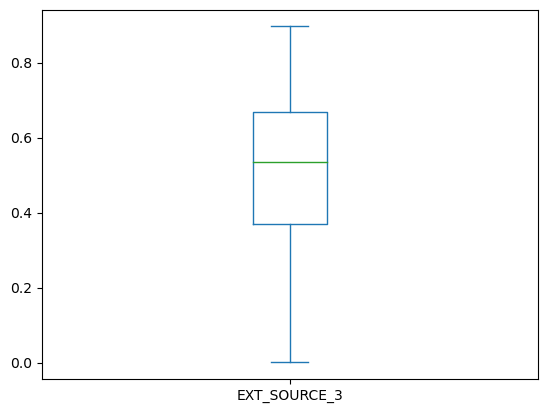

In [33]:
#we observe there are no outliers .Thus, For now we will ignore this column to fix null values.
inp1.EXT_SOURCE_3.plot.box()

#### Droping Columns that we will not use for analysis

In [34]:
#checking the columns
inp1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

######  we can drop the columns with prefix as 'FLAG_DOCUMENT_(number)' from the meta data file description.
###### column denotes the documents were produced or not and phone numbers were given or not. 


In [35]:
#Droping cloumns that we will not need for analysis
col_not_needed=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [36]:
#Dropped the columns
inp1.drop(columns=col_not_needed,axis=1,inplace=True)

In [37]:
#checking on the shape
inp1.shape

(307511, 53)

In [38]:
#Droping cloumns that we will not need for analysis
col_not_needed=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']

In [39]:
#Dropped the columns
inp1.drop(columns=col_not_needed,axis=1,inplace=True)

In [40]:
#checking on the shape
inp1.shape

(307511, 48)

In [41]:
#Droping cloumns that we will not need for analysis
col_not_needed=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']

In [42]:
#Dropped the columns
inp1.drop(columns=col_not_needed,axis=1,inplace=True)

In [43]:
#checking on the shape
inp1.shape

(307511, 43)

## we finally have our data set for analyis

In [44]:
#checking on the info
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

#### Conversion of negative values

As there are columns DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE with negative values.
we need to make them absolute for better analysis


In [45]:
#conversion of negative values
inp1['DAYS_BIRTH']=inp1.DAYS_BIRTH.abs()

In [46]:
inp1['DAYS_EMPLOYED']=inp1.DAYS_EMPLOYED.abs()

In [47]:
inp1['DAYS_ID_PUBLISH']=inp1.DAYS_ID_PUBLISH.abs()

In [48]:
inp1['DAYS_LAST_PHONE_CHANGE']=inp1.DAYS_LAST_PHONE_CHANGE.abs()

In [49]:
inp1['DAYS_REGISTRATION']=inp1.DAYS_REGISTRATION.abs()

In [50]:
# we can descibe to see the days columns to find insights
days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
inp1[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


##### After describing we can notice that DAYS_EMPLOYED could have outliers as in an year we only have 365 days 

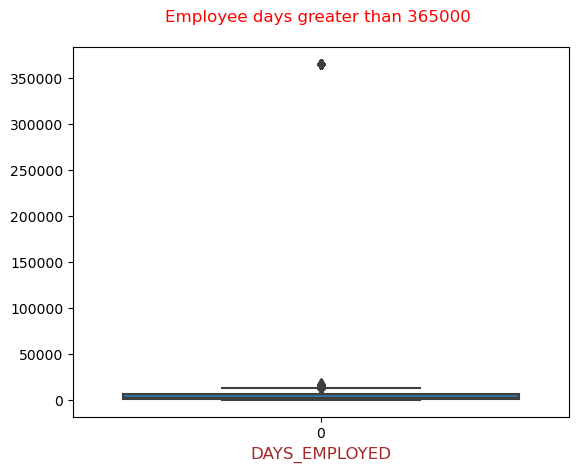

In [51]:
#box plot to see the DAYS_EMPLOYED colum have outliers
plt.title("Employee days greater than 365000 \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("DAYS_EMPLOYED", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(data=inp1.DAYS_EMPLOYED)
plt.show()

After plotting the box plot we can really confirm that DAYS_EMPLOYEE has an outlier 

##### Analysis and Impute on categorical column

In [52]:
#checking the CODE_GENDER column
inp1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

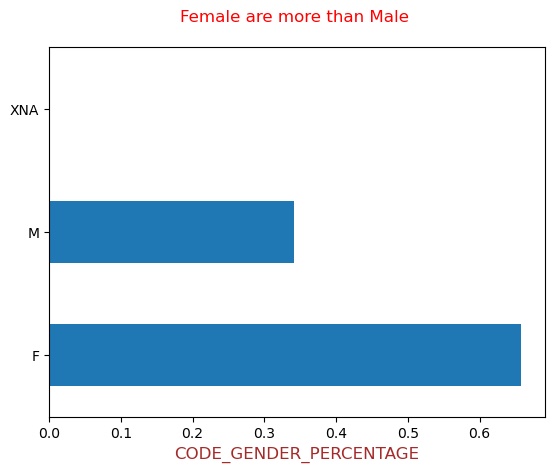

In [53]:
#checking CODE_GENDER column in percentage
plt.title("Female are more than Male \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("CODE_GENDER_PERCENTAGE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
inp1.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()


From the above graph we can see that female are 65% than male .
So, we can impute the XNA values with female for better analyis

In [54]:
#imputing the XNA values with Female values for code_gender column
inp1.loc[inp1.CODE_GENDER=='XNA','CODE_GENDER']='F'

In [55]:
#Recheking the code_gener column
inp1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [56]:
#checking on the ORGANIZATION_TYPE
inp1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

we can see XNA columns are more in the organsation type

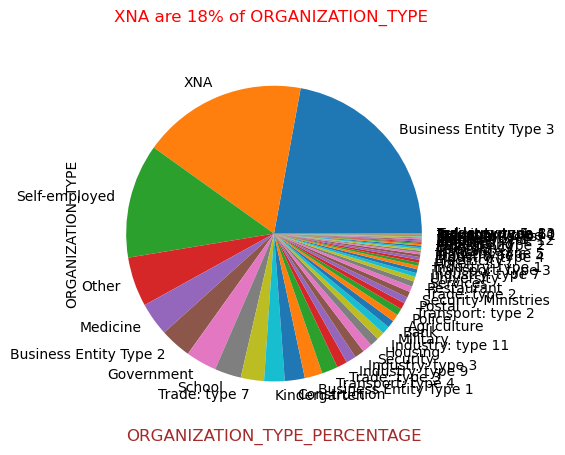

In [57]:
#checking on the ORGANIZATION_TYPE as percentage, 
#There are 18% of rows with XNA which is more than the total rows 307511. so, we can drop the column 
plt.title("XNA are 18% of ORGANIZATION_TYPE \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("ORGANIZATION_TYPE_PERCENTAGE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
inp1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

In [58]:
#droping the rows with XNA 
inp1=inp1.drop(inp1.loc[inp1['ORGANIZATION_TYPE']=='XNA'].index)

In [59]:
#Rechecking the organization type
inp1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Data Imbalance

##### we see the target column has imbalance of data and we will confirm based on the bar plot

In [60]:
## Target variable with imbalace data
inp1.TARGET.value_counts(normalize=True)

0    0.9134
1    0.0866
Name: TARGET, dtype: float64

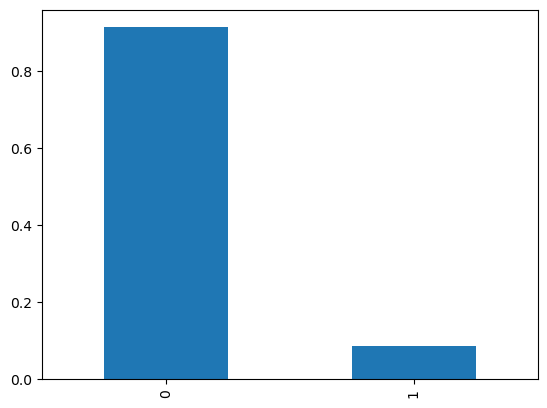

In [61]:
#ploting into bar
inp1.TARGET.value_counts(normalize=True).plot.bar()
plt.show()


## Outliers

In [62]:
#describing the column
inp1.CNT_CHILDREN.describe()

count    252137.000000
mean          0.498515
std           0.763161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

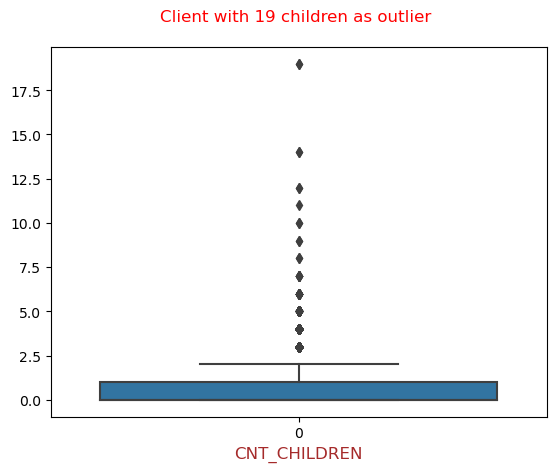

In [63]:
#From the box plot we can see there are outliers.
#Based on the description of the column it denotes the number of childer the client has.
# we can conclude as it's not possible for a client to have 19 children
plt.title("Client with 19 children as outlier \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("CNT_CHILDREN", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(data=inp1.CNT_CHILDREN)
plt.show()

In [63]:
#describing column AMT_GOODS_PRICE
inp1.AMT_GOODS_PRICE.describe()

count    2.518810e+05
mean     5.494057e+05
std      3.732685e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

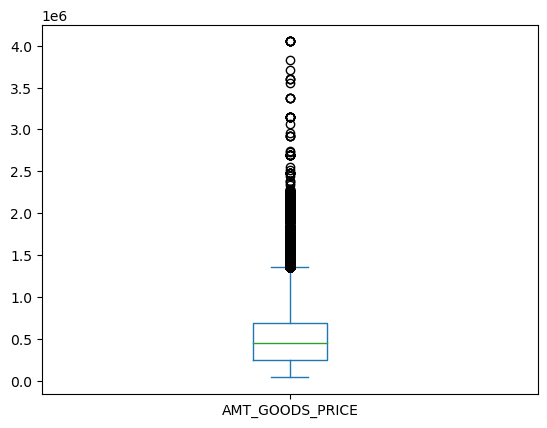

450000.0

In [64]:
# there are outliers based on the box plot 
inp1.AMT_GOODS_PRICE.plot.box()
plt.show()
inp1.AMT_GOODS_PRICE.median()

In [65]:
#describing total income colum
inp1.AMT_INCOME_TOTAL.describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

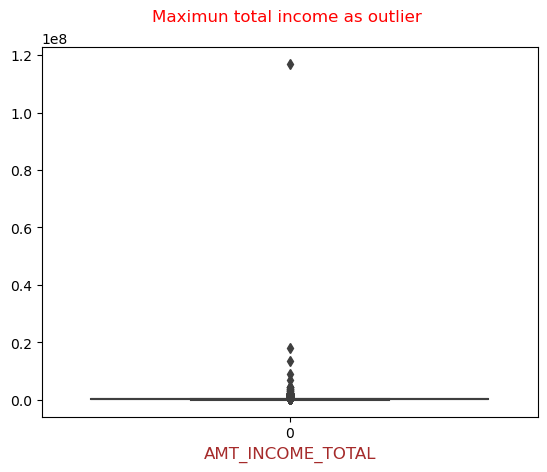

In [66]:
#plotting to see outliers for total income
plt.title("Maximun total income as outlier \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("AMT_INCOME_TOTAL", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(data=inp1.AMT_INCOME_TOTAL)
plt.show()

##### From the plot we can see that there is some one with higher income as an outlier

In [67]:
#describing AMT_CREDIT
inp1.AMT_CREDIT.describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

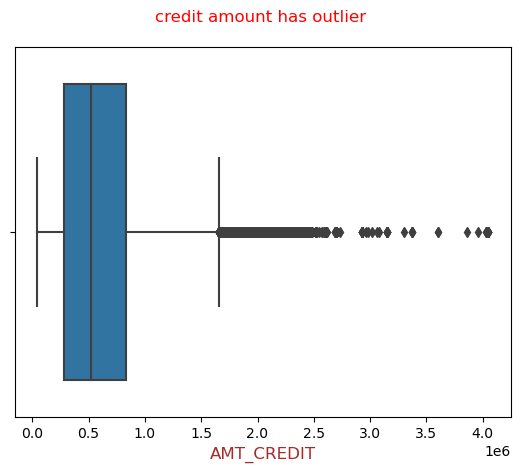

In [68]:
# based on the plot we can see there are outliers from 1.6 
plt.title("credit amount has outlier \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xlabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
sns.boxplot(inp1.AMT_CREDIT)
plt.show()

### Binning 

##### Binning AMT_CREDIT , AMT_TOTAL_INCOME and AMT_GOODS_PRICE columns for more insights

In [69]:
#getting the maximum amount for binning with total income
inp1.AMT_INCOME_TOTAL.max()

117000000.0

In [70]:
#checking the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of total income variable
inp1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    157500.0
0.70    202500.0
0.90    270000.0
0.95    355334.4
0.99    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [71]:
#create bins for total income with range
income_bins=[0,25000,50000,75000,100000,125000,150000,175000,
             200000,225000,250000,275000,300000,325000,350000,
             375000,400000,425000,450000,475000,500000,10000000000]
range_income=['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', 
              '125000-150000', '150000-175000','175000-200000','200000-225000',
              '225000-250000','250000-275000','275000-300000','300000-325000',
              '325000-350000','350000-375000','375000-400000','400000-425000',
              '425000-450000','450000-475000','475000-500000','500000 and above']
inp1['AMT_INCOME_RANGE']=pd.cut(inp1['AMT_INCOME_TOTAL'],income_bins,labels=range_income)


In [72]:
#verifying if the column income rage has be created
inp1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000


In [73]:
#maximun for credit amount
inp1.AMT_CREDIT.max()

4050000.0

In [74]:
#checking the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of credit amount variable
inp1.AMT_CREDIT.quantile([0.5,0.7,0.9,0.95,0.99])

0.50     521280.0
0.70     757413.0
0.90    1170000.0
0.95    1350000.0
0.99    1886850.0
Name: AMT_CREDIT, dtype: float64

In [75]:
#create bins for credit amount
credit_bins = [0,150000,200000,250000,300000,350000,400000,
        450000,500000,550000,600000,650000,700000,
        750000,800000,850000,900000,1000000000]
credit_range = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', 
                '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000',
                '600000-650000','650000-700000','700000-750000','750000-800000','800000-850000',
                '850000-900000','900000 and above']
inp1['AMT_CREDIT_RANGE']=pd.cut(inp1['AMT_CREDIT'],credit_bins,labels=credit_range)

In [76]:
#verfying the column credit range has been created
inp1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000


In [77]:
#maximum of AMT_GOODS_PRICE
inp1.AMT_GOODS_PRICE.max()

4050000.0

In [78]:
#checking the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of goods price variable
inp1.AMT_GOODS_PRICE.quantile([0, 0.25, 0.5, 0.75, 0.95, 1])

0.00      40500.0
0.25     247500.0
0.50     450000.0
0.75     693000.0
0.95    1332000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [79]:
# Binning 'AMT_GOODS_PRICE' based on quantiles
inp1['AMT_GOODS_PRICE_RANGE'] = pd.qcut(inp1.AMT_GOODS_PRICE, q=[0, 0.25, 0.5, 0.75, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])

In [80]:
#verifying the column AMT_GOODS_PRICE_RANGE created
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,LOW
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000,VERY_LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,617.0,0.0,0.0,0.0,0.0,0.0,0.0,125000-150000,300000-350000,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000,MEDIUM


#### Create two new dataframe with the given TARGET variable 
1. Target_0 :All other cases where target==0
2. Target_1 :Client with payment difficulties where target==1

In [81]:
#creating new dataframe where target==0 denotes all other cases
target_0=inp1[inp1['TARGET']==0]

In [82]:
#creating new dataframe where target==1 denotes client with payment difficulties
target_1=inp1[inp1['TARGET']==1]

In [83]:
#veiw of target_0 dataframe
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,828.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-75000,0-150000,VERY_LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,617.0,0.0,0.0,0.0,0.0,0.0,0.0,125000-150000,300000-350000,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-125000,500000-550000,MEDIUM
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,"75000,100000",450000-500000,MEDIUM


In [84]:
#veiw of target_1 dataframe
target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,LOW
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,161.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-125000,900000 and above,HIGH
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-225000,900000 and above,HIGH
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,125000-150000,250000-300000,VERY_LOW
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,591.0,0.0,0.0,0.0,0.0,0.0,2.0,300000-325000,900000 and above,HIGH


In [85]:
#checking the shape of target_0 dataframe
target_0.shape

(230302, 46)

In [86]:
#checking the shape of target_1 dataframe
target_1.shape

(21835, 46)

#### Ratio of Taget variable imbalance

In [87]:
ratio=len(target_0)/len(target_1)
round(ratio)

11

##### from the above ratio we can conclude that there was 11 number of 0's for every 1

### Data Analysis

##### Univariate Analysis  for categorical variable

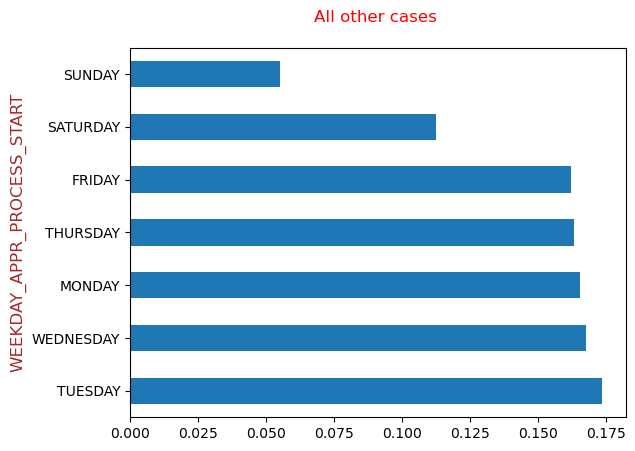

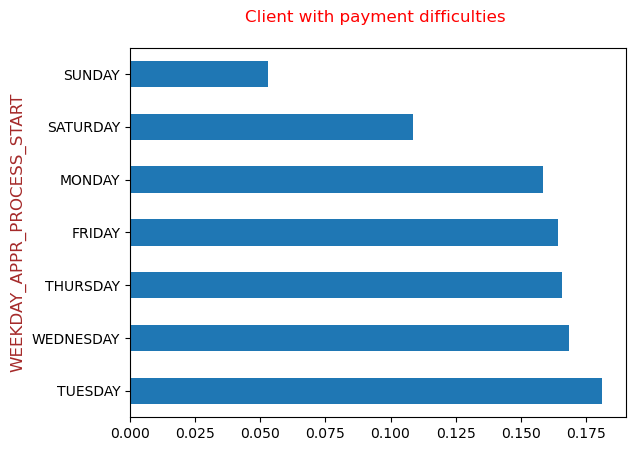

In [88]:
#Univariate analysis of categoriacal variable WEEKDAY_APPR_PROCESS_START for both Target 0 and 1

#Target_0
plt.title("All other cases \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.ylabel("WEEKDAY_APPR_PROCESS_START", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.show()

#Target_1

plt.title("Client with payment difficulties \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.ylabel("WEEKDAY_APPR_PROCESS_START", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
target_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.show()

##### Based on the plot we see that for visiting banks, enquiring or filling for loans weekdays are the best option than weekends

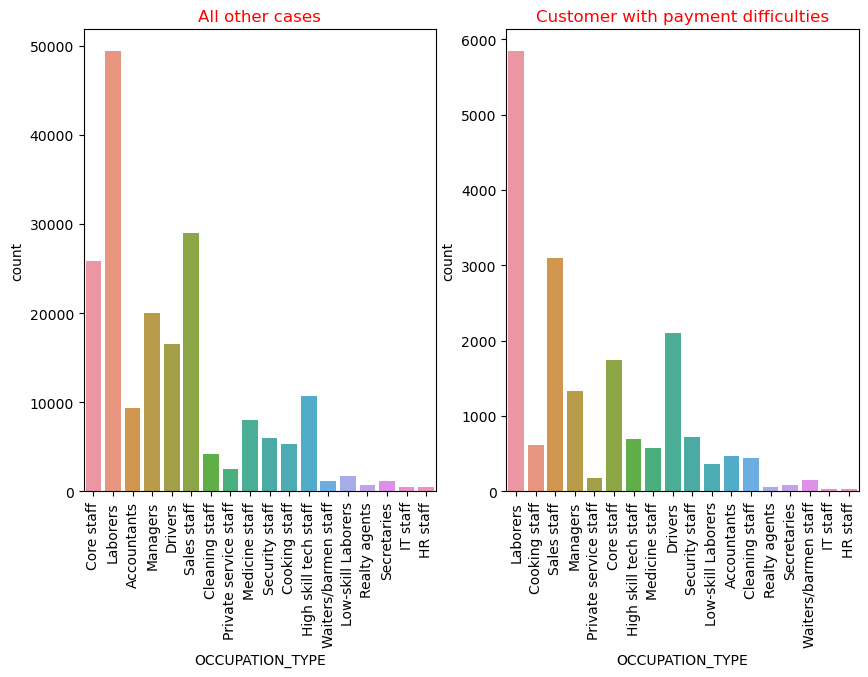

In [89]:
#Univariate analysis of categoriacal variable OCCUPATION_TYPE for both Target 0 and 1

#Target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0.OCCUPATION_TYPE)
plt.title('All other cases', fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xticks(rotation=90)


#Target_1
plt.subplot(1,2,2)
sns.countplot(target_1.OCCUPATION_TYPE)
plt.title('Customer with payment difficulties', fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.xticks(rotation=90)
plt.show()

##### Based on plot we can see that most of the loans are taken by the people with occupation as Laborers and the second highest of people for loan are with occupation Sales staff .However, both kind of occupation people can be defaulters too.

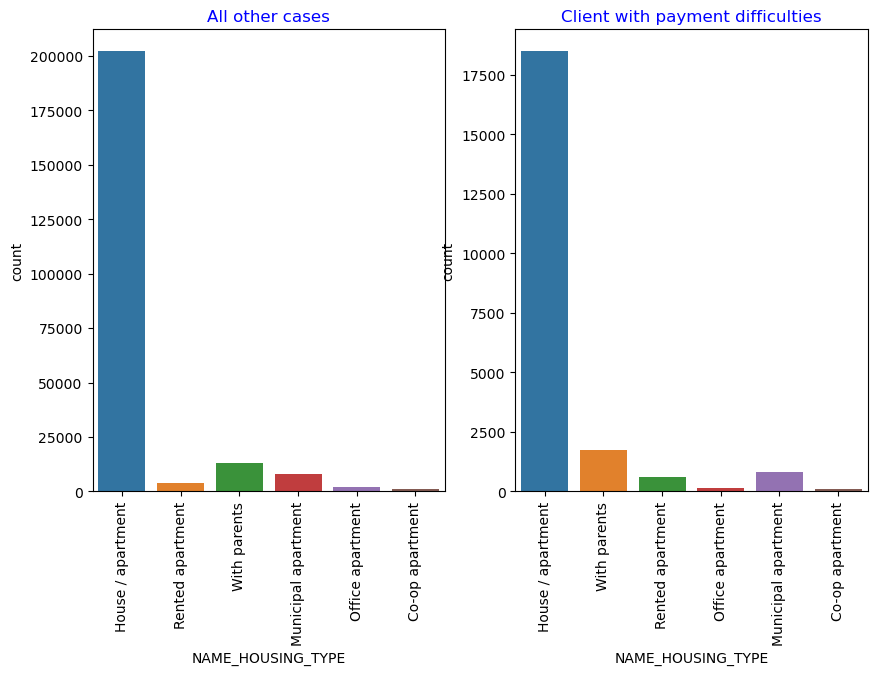

In [90]:
#Univariate Analysis on NAME_HOUSING_TYPE

#target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0.NAME_HOUSING_TYPE)
plt.title('All other cases',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.xticks(rotation=90)

#target_1
plt.subplot(1,2,2)
sns.countplot(target_1.NAME_HOUSING_TYPE)
plt.xticks(rotation=90)
plt.title('Client with payment difficulties',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.show()

##### Based on the above we can see that most of the client who are living with their own house/appartment tend to be defaulters as well as loan payers

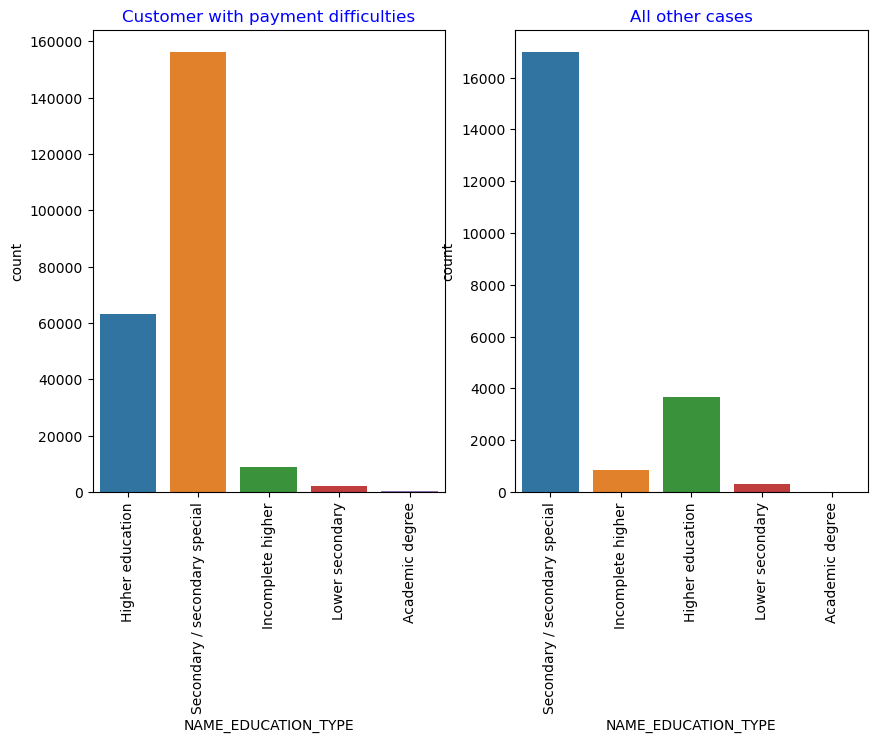

In [91]:
#Univariate Analysis on NAME_EDUCATION_TYPE

#target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0.NAME_EDUCATION_TYPE)
plt.title('Customer with payment difficulties',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.xticks(rotation=90)

#target_1
plt.subplot(1,2,2)
sns.countplot(target_1.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.title('All other cases',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.show()

##### Based on the above we see that people with education type as secondary/secondary special are high in both the cases 

### Numerical Univariate analysis

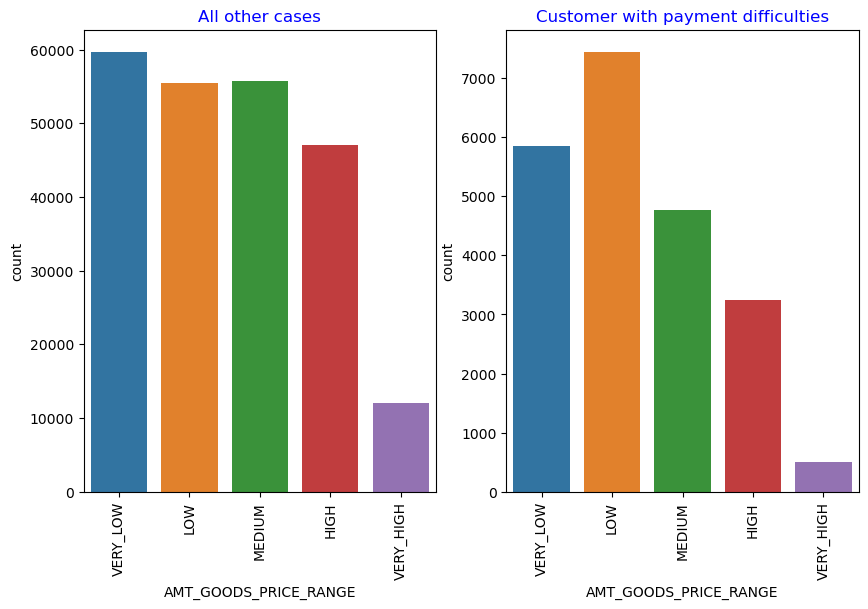

In [92]:
#Univariate Analysis on AMT_GOODS_PRICE_RANGE

#target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(target_0.AMT_GOODS_PRICE_RANGE)
plt.title('All other cases',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.xticks(rotation=90)

#target_1
plt.subplot(1,2,2)
sns.countplot(target_1.AMT_GOODS_PRICE_RANGE)
plt.xticks(rotation=90)
plt.title('Customer with payment difficulties',fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Blue'})
plt.show()

Based on the above we can see the clients with payment difficulties for consumer loans along with goods price 
belongs under Low category.on the other hand, the cases with other clients for consumer loans fall under Very_Low category.

In [93]:
#univariate analysis for 'DAYS_BIRTH'
#converting days into years for the column for better understanding
target_0['DAYS_BIRTH']=target_0.DAYS_BIRTH/365


In [94]:
#converting days into years 
target_1['DAYS_BIRTH']=target_1.DAYS_BIRTH/365

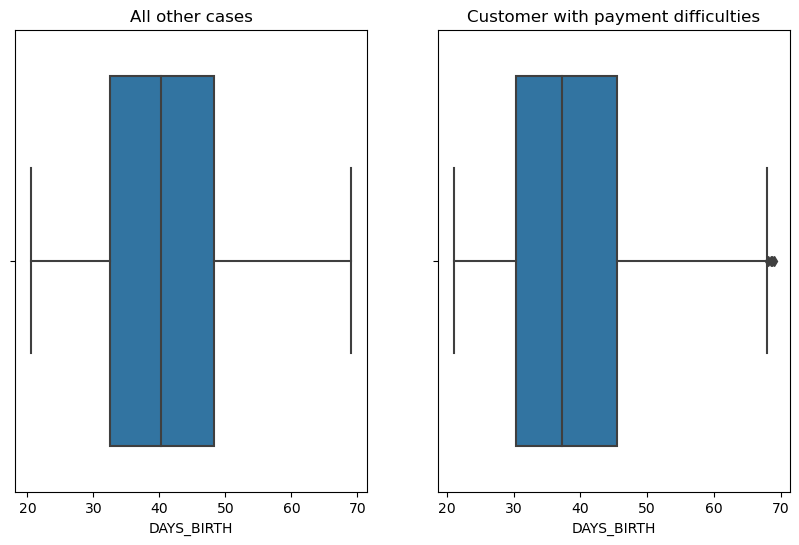

In [96]:
#target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(target_0.DAYS_BIRTH)
plt.title('All other cases')

#target_1
plt.subplot(1,2,2)
sns.boxplot(target_1.DAYS_BIRTH)
plt.title('Customer with payment difficulties')
plt.show()

From the above box plot we can note that all other cases for payment lies of year in between 34 to 49 years.
however, customer with payment difficulties lies in between 30 to 45 years.

### Bivariate Analysis

##### AMT_CREDIT Vs NAME_EDUCATION_TYPE

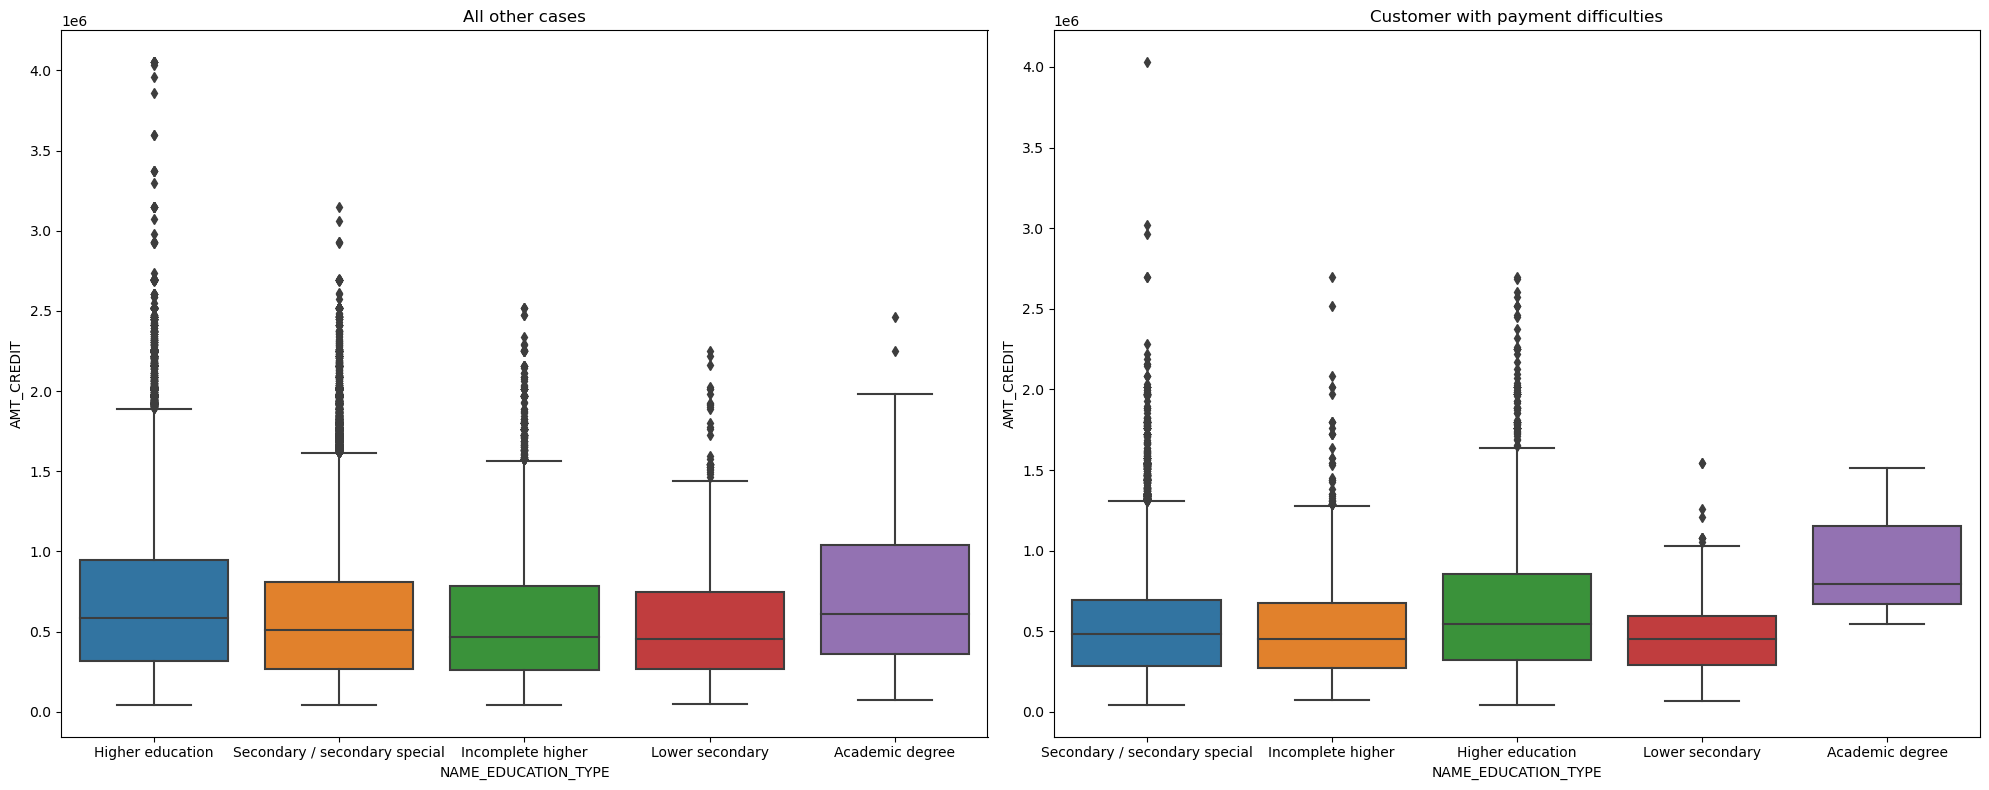

In [97]:
#bivariate analysis on AMT_CREDIT and NAME_EDUCATION_TYPE

#target_0
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('All other cases')

#target_1
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()


Based on the plot we can see that the customers with payment difficulties are those having an academic degree have less credit amount on comparison with all other cases.However, other education types seem have more or less credit amount in both cases.

##### AMT_INCOME_RANGE Vs AMT_CREDIT

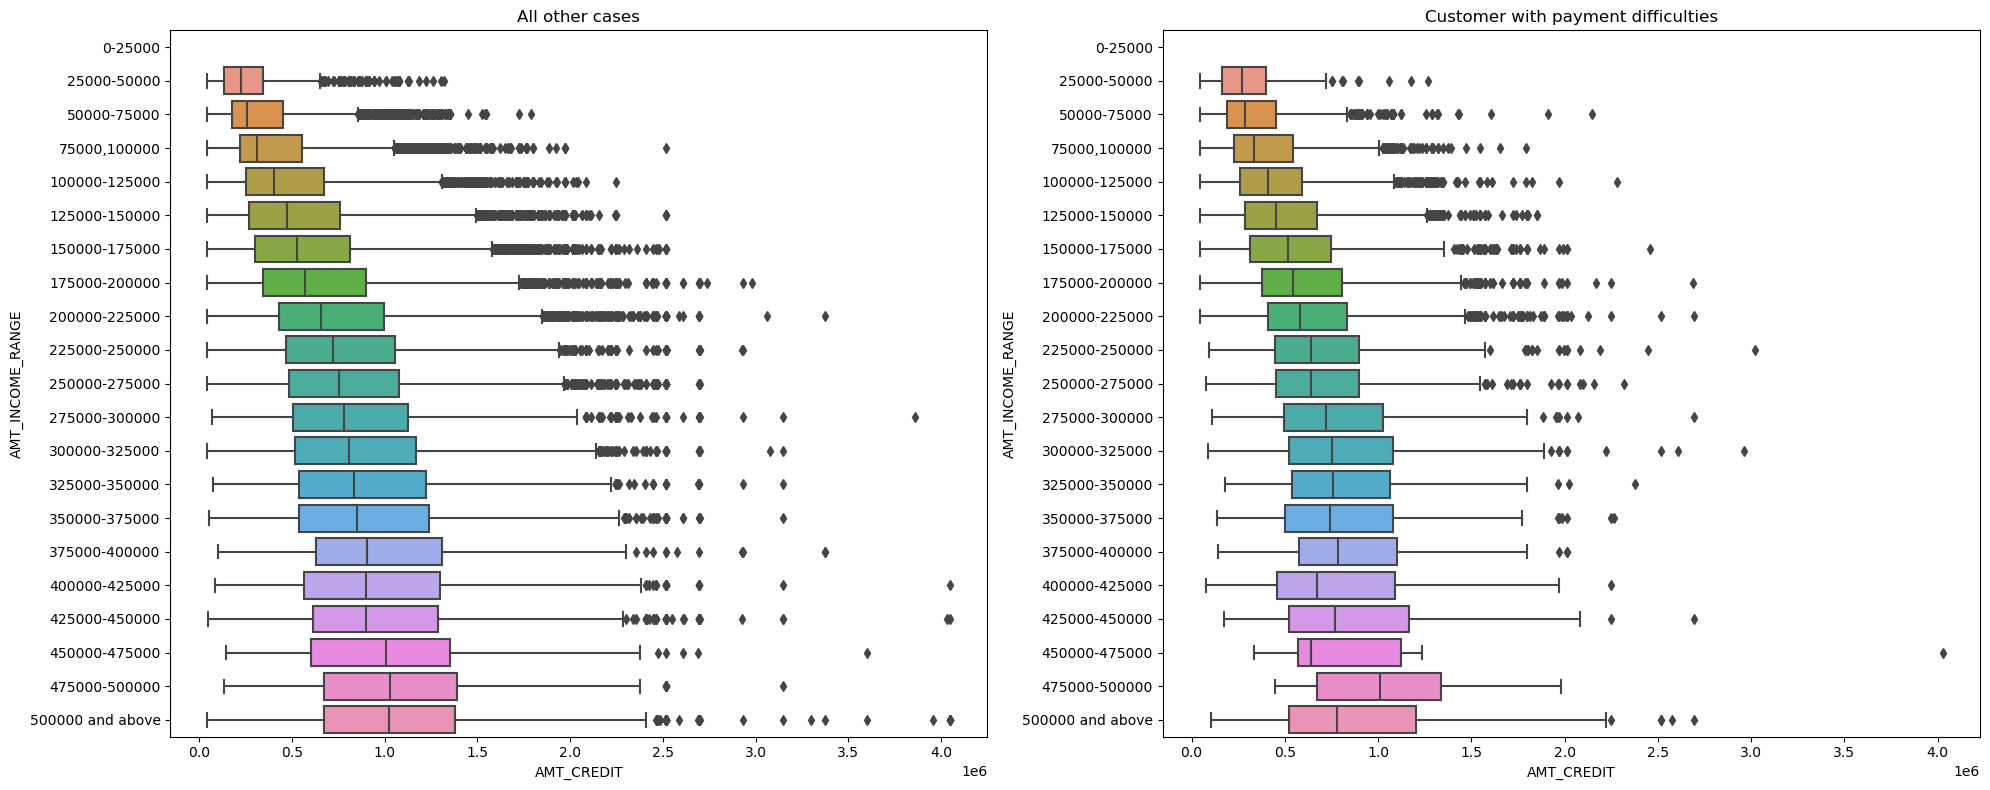

In [98]:
#bivariate analysis on AMT_INCOME_RANGE and AMT_CREDIT

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_INCOME_RANGE',x='AMT_CREDIT')
plt.title('All other cases')
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_INCOME_RANGE',x='AMT_CREDIT')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

Based on the above plot we can see that all other cases get higher credit amount for people whose income lies between 4.5lakhs and 4.75 lakhs.However,if they are provided with still more credit amount they can become defaulters. 

###### AMT_CREDIT Vs OCCUPATION_TYPE

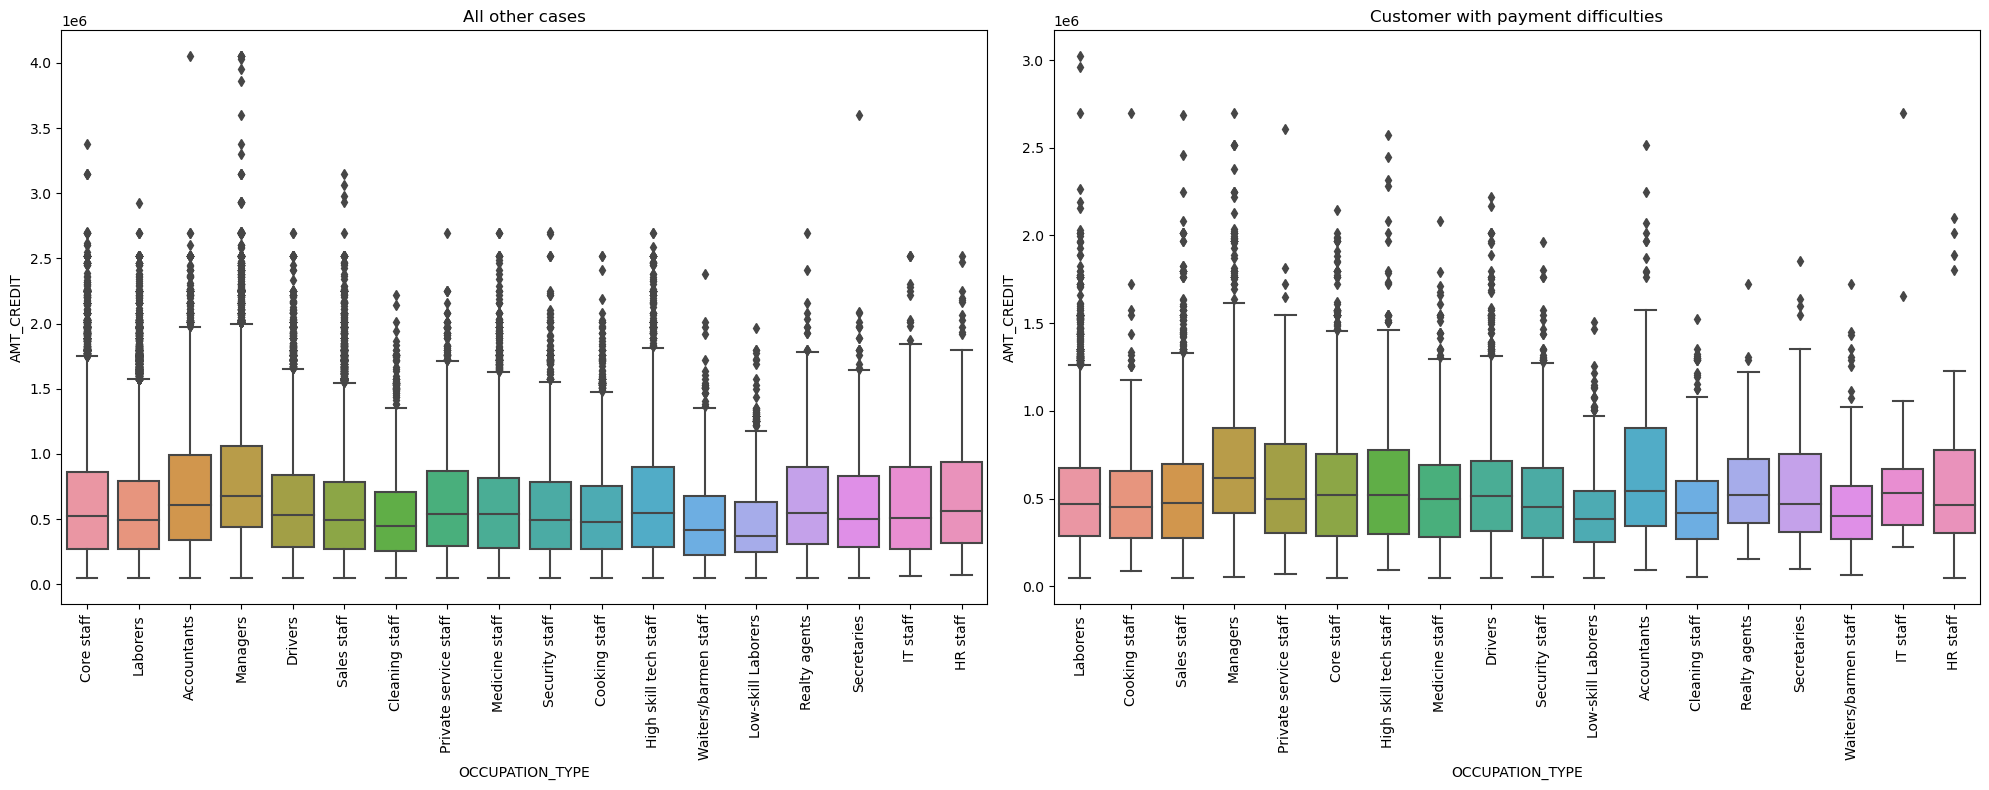

In [99]:
#bivariate analysis on AMT_CREDIT and OCCUPATION_TYPE

#target_0
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=target_0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('All other cases')
plt.xticks(rotation=90)

#target_1
plt.subplot(1,2,2)
sns.boxplot(data=target_1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Based on the above plot we can see that credit amount was given more to the clients with occupation as
Accounts,IT staff ,High skill tech staff and Realty agents.

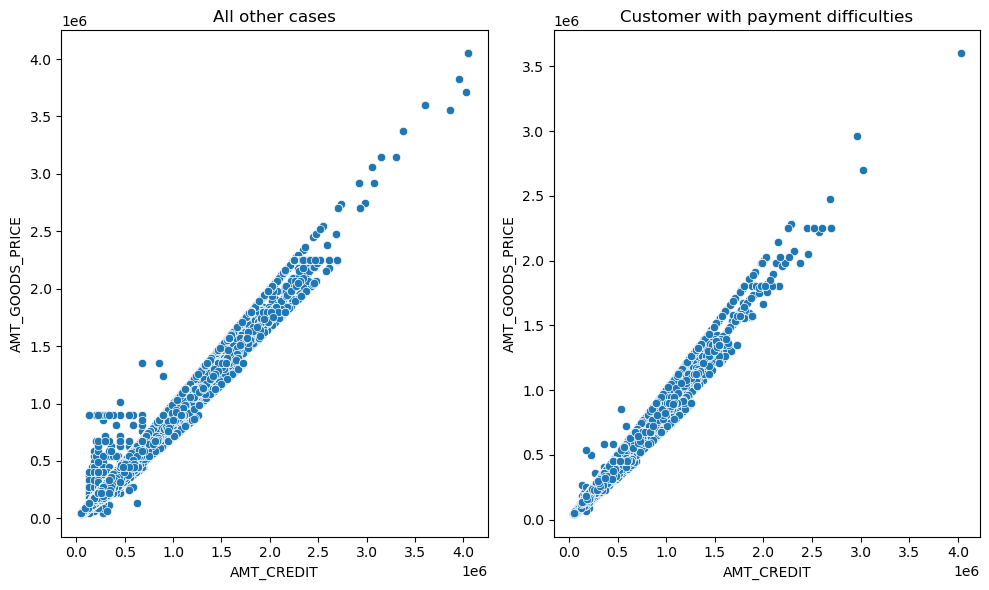

In [113]:
#bivariate analysis on AMT_CREDIT and AMT_GOODS_PRICE

#target_0
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('All other cases')

#target_1
plt.subplot(1,2,2)
sns.scatterplot(data=target_1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

Based on the plot we can see that AMT_CREDIT and AMT_GOODS_PRICE are positively correlated.

#### Correlation of top 10 columns

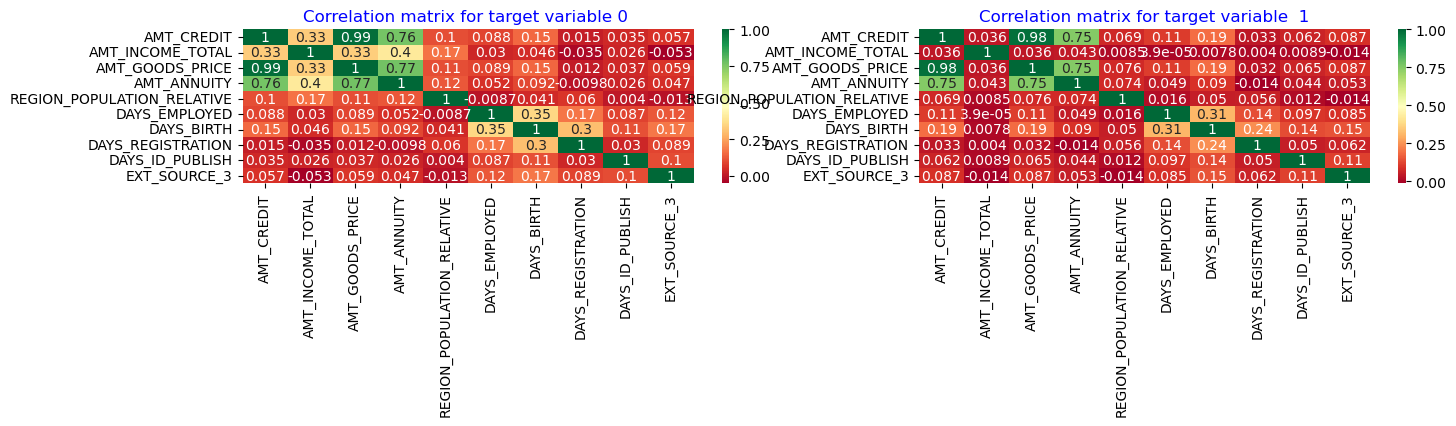

In [100]:
#analysis of Top 10 columns to verify the correlation between them

#target_0
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
sns.heatmap(target_0[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY',
                      'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_BIRTH',
                      'DAYS_REGISTRATION','DAYS_ID_PUBLISH','EXT_SOURCE_3']].corr(),cmap='RdYlGn',annot=True)
plt.title('Correlation matrix for target variable 0 ',color='blue')

#target_1
plt.subplot(1,2,2)
sns.heatmap(target_1[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY',
                      'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_BIRTH',
                      'DAYS_REGISTRATION','DAYS_ID_PUBLISH','EXT_SOURCE_3']].corr(),cmap='RdYlGn',annot=True)
plt.title('Correlation matrix for target variable  1',color='blue')
plt.show()


Based on the above correlation matrix we can see that correlation of both are almost same.The AMT_CREDIT and AMT_GOODS_PRICE are highly correlated.

#### Multivariate Analysis

In [101]:
#analysis of education Vs family status Vs target
res=pd.pivot_table(data=inp1,index="NAME_EDUCATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET")
res

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.000000,0.023529,0.000000,0.034483,NaN,0.000000
Higher education,0.066940,0.050948,0.058437,0.064029,0.0,0.048536
Incomplete higher,0.095280,0.081218,0.083658,0.095870,NaN,0.067416
Lower secondary,0.152104,0.130562,0.171429,0.150127,0.0,0.082192
Secondary / secondary special,0.115145,0.091267,0.097737,0.124455,NaN,0.061892


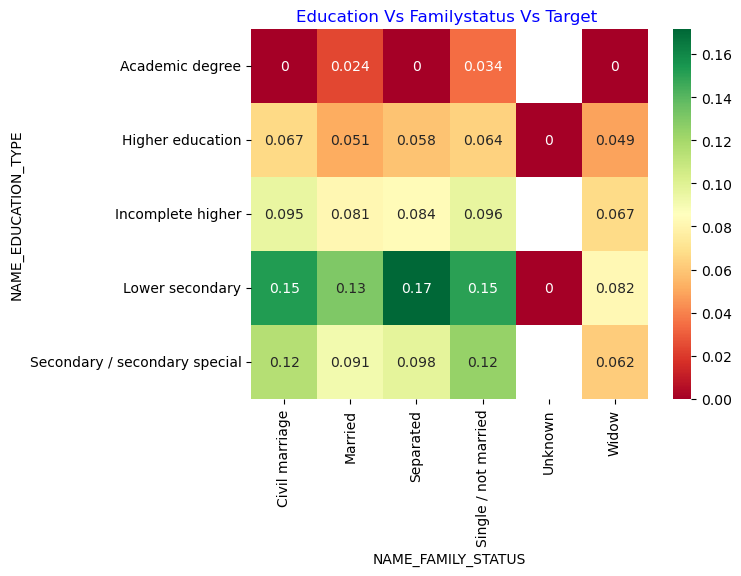

In [129]:
plt.title('Education Vs Familystatus Vs Target ',color='blue')
sns.heatmap(res,cmap="RdYlGn",annot=True)
plt.show()

Based on the above heatmap we can see that most of peolpe who are with status seperated have lower secondary as their education.

In [102]:
#analysis of contract type Vs Income type Vs target
res=pd.pivot_table(data=inp1,index="NAME_CONTRACT_TYPE",columns="NAME_INCOME_TYPE",values="TARGET")
res

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
NAME_CONTRACT_TYPE,,,,,,,
Cash loans,NaN,0.078395,1.0,NaN,0.059891,0.0,0.099433
Revolving loans,0.0,0.046453,0.0,0.0,0.032673,0.0,0.064341


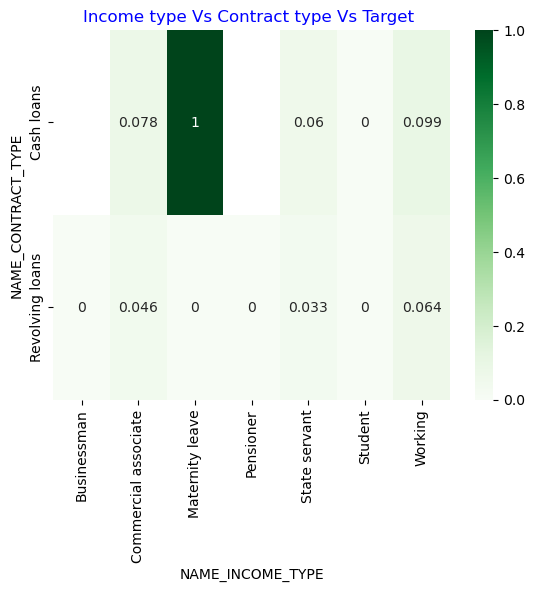

In [103]:
#plotting the heat map
plt.title('Income type Vs Contract type Vs Target ',color='blue')
sns.heatmap(res,cmap="Greens",annot=True)
plt.show()

From the plot we can see that  Working, State servent and Commercial associates are higher in default percentage.
Maternity category can be a problem with high repayment.

#### Including the Previous_application.csv for analysis

In [138]:
#read the previous_data.csv
inp2=pd.read_csv('previous_application.csv')

In [139]:
#verify the info
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [140]:
#checking the dataframe
inp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
#checking the shape
inp2.shape

(1670214, 37)

In [142]:
#describing the data frame
inp2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [143]:
#checking the shape of application_data
inp0.shape

(307511, 122)

In [144]:
#checking the dataframe of application_data
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
#analyis of column NAME_CASH_LOAN_PURPOSE
inp2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

#### Univariate Analysis

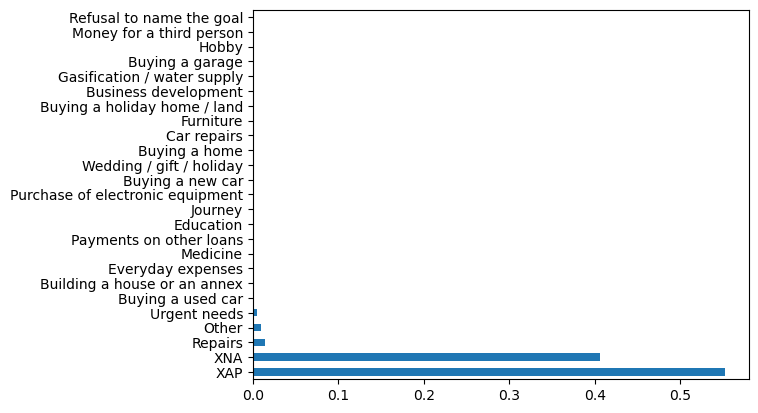

In [146]:
#analysis on NAME_CASH_LOAN_PURPOSE 
inp2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()
plt.show()

Based on the plot we see most of loan was given for the purpose of Repairs.

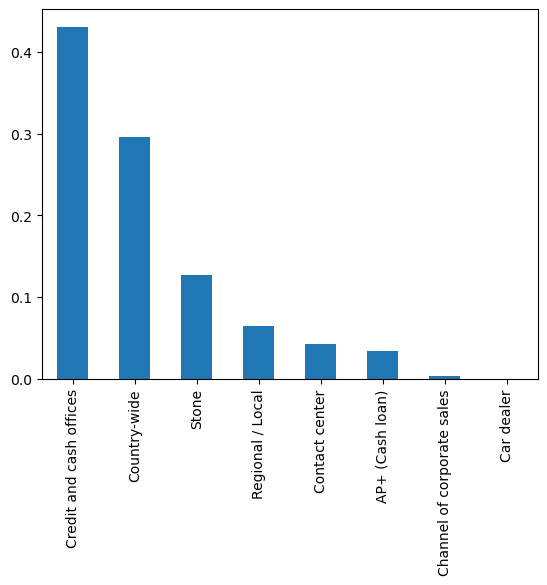

In [147]:
#analysis on channel Type 
inp2.CHANNEL_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

Based on the above we see that the clients were contacted through credit and cash offices.

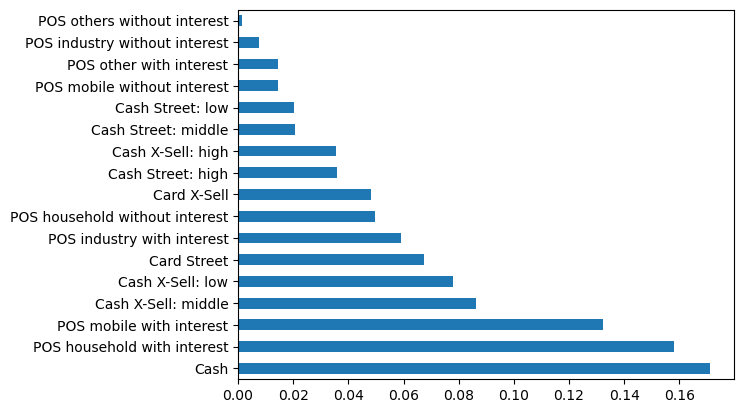

In [148]:
#analysis on PRODUCT_COMBINATION
inp2.PRODUCT_COMBINATION.value_counts(normalize=True).plot.barh()
plt.show()

Based on the plot we see that the Cash was the highest product combination.

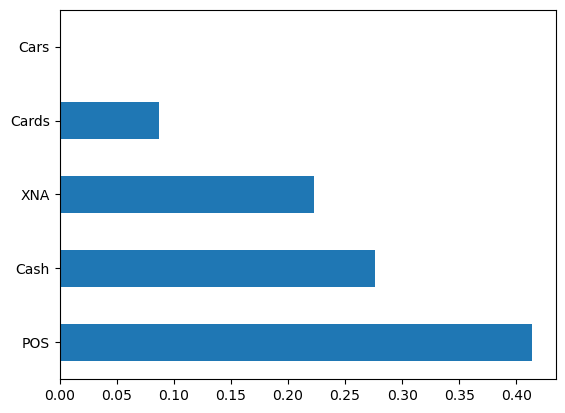

In [152]:
#analysis on NAME_PORTFOLIO
inp2.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh()
plt.show()

Based on the above plot we see most of the payment is made through POS. 

##### Bivariate Analysis

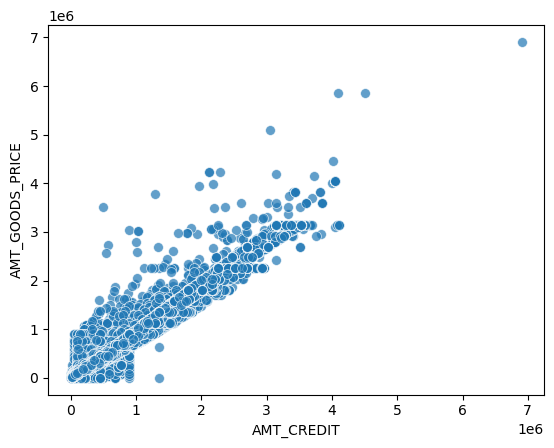

In [160]:
#analysis on AMT_CREDIT and AMT_GOOD_PRICE
sns.scatterplot(inp2.AMT_CREDIT,inp2.AMT_GOODS_PRICE,alpha= 0.7, s = 50)
plt.show()

Based on the scatter plot we can see that the AMT_CREDIT and AMT_GOODS_PRICE are positively correlated.

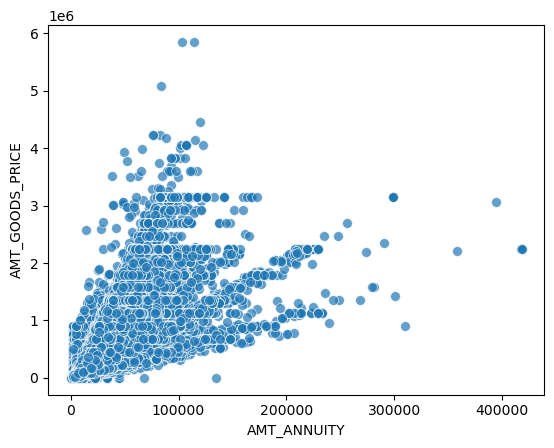

In [162]:
#analysis on AMT_ANNUITY and AMT_GOOD_PRICE
sns.scatterplot(inp2.AMT_ANNUITY,inp2.AMT_GOODS_PRICE,alpha= 0.7, s = 50)
plt.show()

Based on the scatter plot above we can see that the AMT_ANNUITY can be more based on the AMT_GOODS_PRICE.

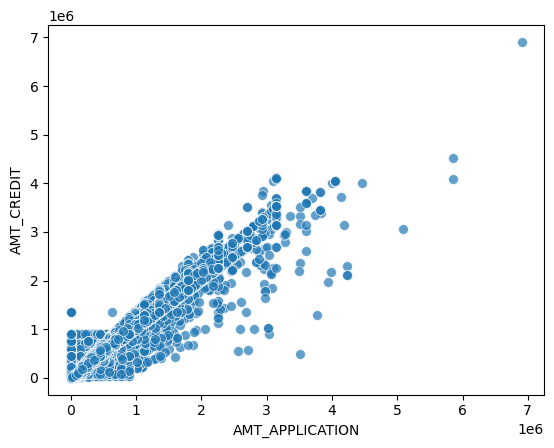

In [163]:
#analysis on AMT_APPLICATION and AMT_CREDIT
sns.scatterplot(inp2.AMT_APPLICATION,inp2.AMT_CREDIT,alpha= 0.7, s = 50)
plt.show()

##### Merging the two file

In [168]:
#merging the two files application_data.csv and previous_application.csv
merged_df=pd.merge(left=inp0,right=inp2,how='inner',on='SK_ID_CURR')

In [169]:
#checking the shape of merged dataframe
merged_df.shape

(1413701, 158)

In [170]:
#checking the dataframe
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [171]:
#First lets check the NAME_CONTRACT_STATUS percentage
merged_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

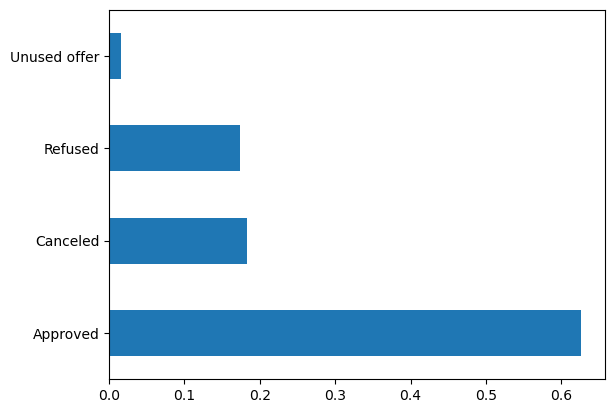

In [172]:
#ploting the bar for better analysis
merged_df['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

Based on the plot we can see that approved percent of loan are higher.

##### Data Analysis

In [173]:
#creating new data frames based on the contract status approved,canceled,refused,unused offer
approved_df=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Approved']
refused_df=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Refused']
canceled_df=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df=merged_df[merged_df['NAME_CONTRACT_STATUS']=='Unused offer']

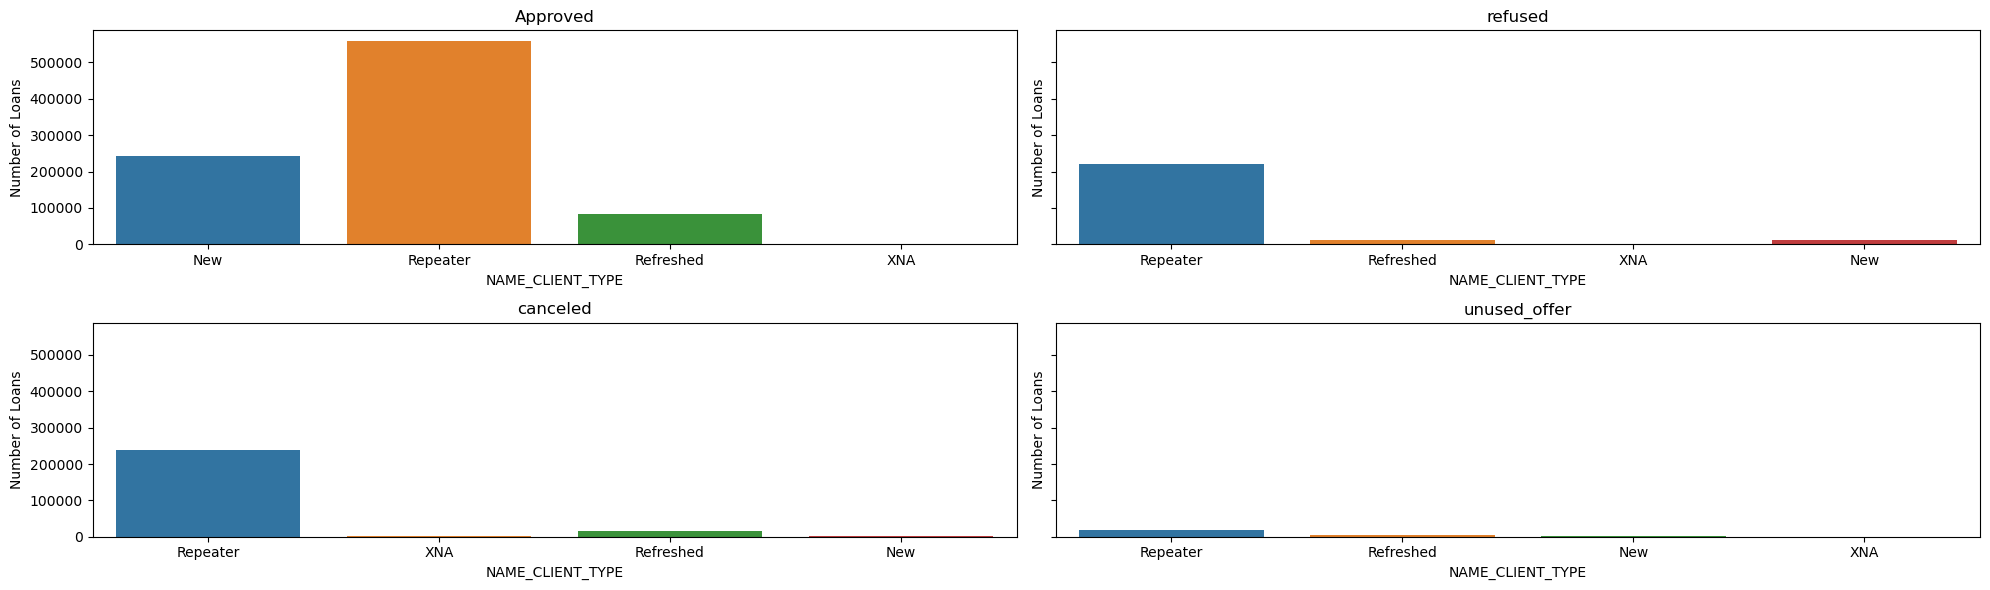

In [174]:
#analysis with NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_CLIENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_CLIENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_CLIENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_CLIENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_CLIENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_CLIENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_CLIENT_TYPE')
ax4.set_title('unused_offer')
ax4.set_xlabel('NAME_CLIENT_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

Based on the above plot we can see that the Repeater clients have higher approved more loans and 
also,they have lower number of refused and canceled that are similar.

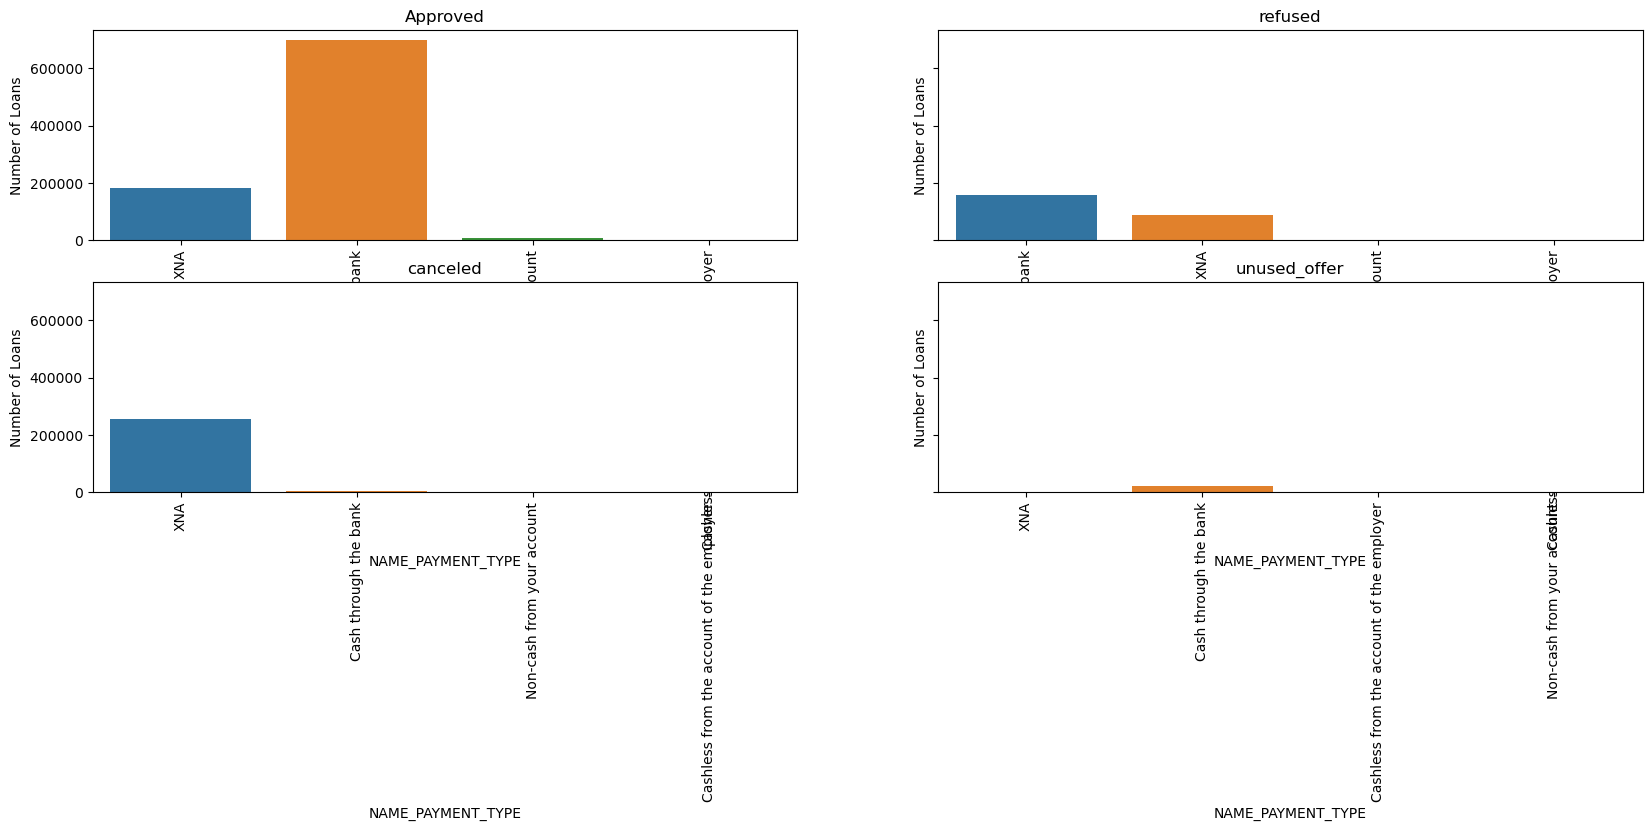

In [175]:
#analysis with NAME_CONTRACT_STATUS and NAME_PAYMENT_TYPE

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_PAYMENT_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_PAYMENT_TYPE')
ax1.set_ylabel('Number of Loans')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_PAYMENT_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_PAYMENT_TYPE')
ax2.set_ylabel('Number of Loans')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_PAYMENT_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_PAYMENT_TYPE')
ax3.set_ylabel('Number of Loans')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_PAYMENT_TYPE')
ax4.set_title('unused_offer')
ax4.set_xlabel('NAME_PAYMENT_TYPE')
ax4.set_ylabel('Number of Loans')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

Based on the graph we can see the that most of the loans that are approved are provided as cash through the bank.

In [176]:
# As we are going to create similar pattern of analyis so we will make the code as one function and reuse it .

def count_plots(column_name):
    fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
    ax1=sns.countplot(ax=ax1,data=approved_df,x=column_name)
    ax1.set_title('Approved')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Number of Loans')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    ax2=sns.countplot(ax=ax2,data=refused_df,x=column_name)
    ax2.set_title('refused')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Number of Loans')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax3=sns.countplot(ax=ax3,data=canceled_df,x=column_name)
    ax3.set_title('canceled')
    ax3.set_xlabel(column_name)
    ax3.set_ylabel('Number of Loans')
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
    ax4=sns.countplot(ax=ax4,data=unused_df,x=column_name)
    ax4.set_title('unused_offer')
    ax4.set_xlabel(column_name)
    ax4.set_ylabel('Number of Loans')
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    plt.tight_layout()
    plt.show()

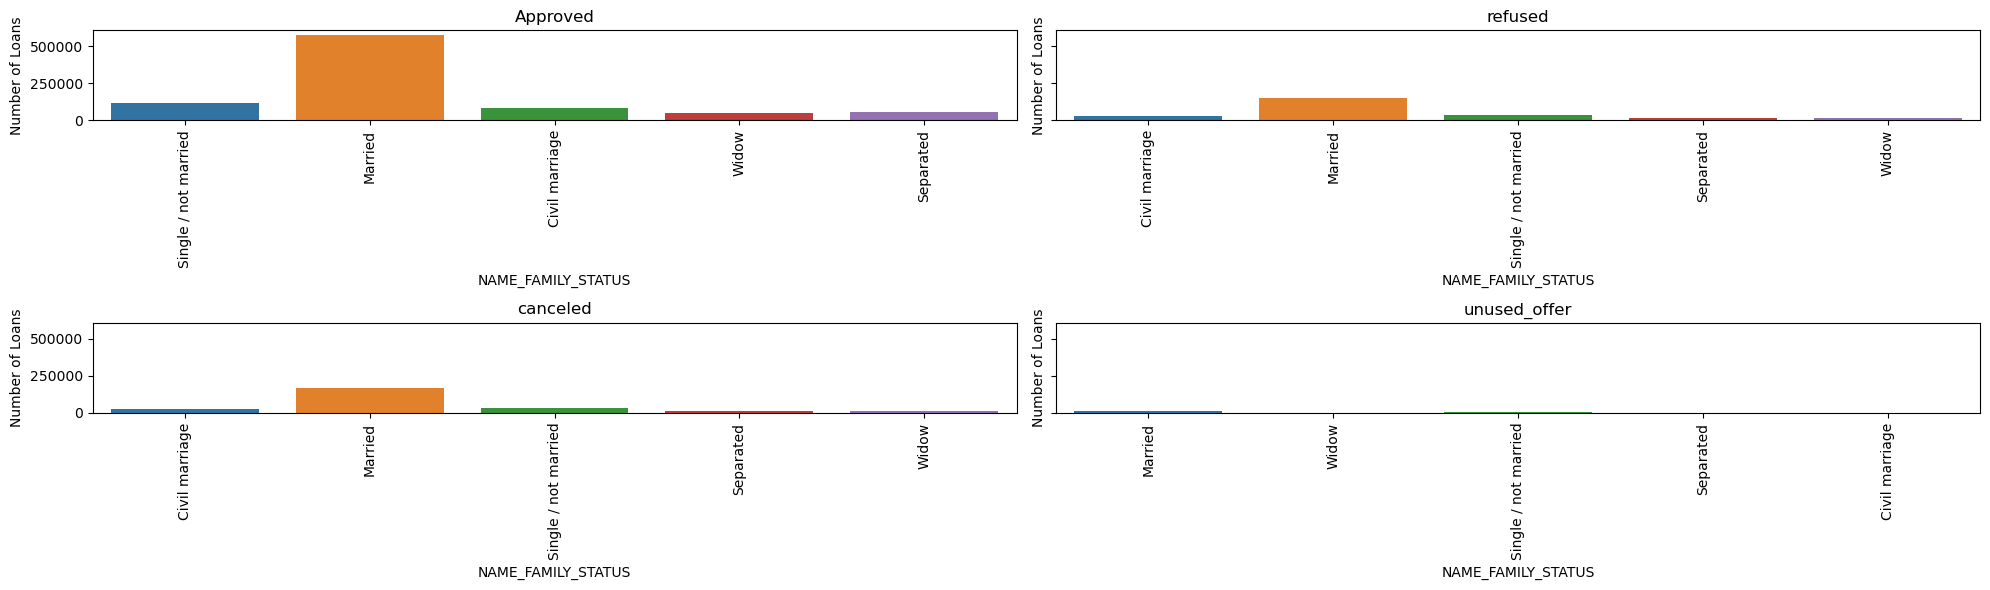

In [177]:
#analysis on 'NAME_FAMILY_STATUS'
count_plots('NAME_FAMILY_STATUS')

Based on the plot we can see that most of the loans have been taken by married people are high and also approved .However,
we can see that they have very less refusal and cancelation of loans.

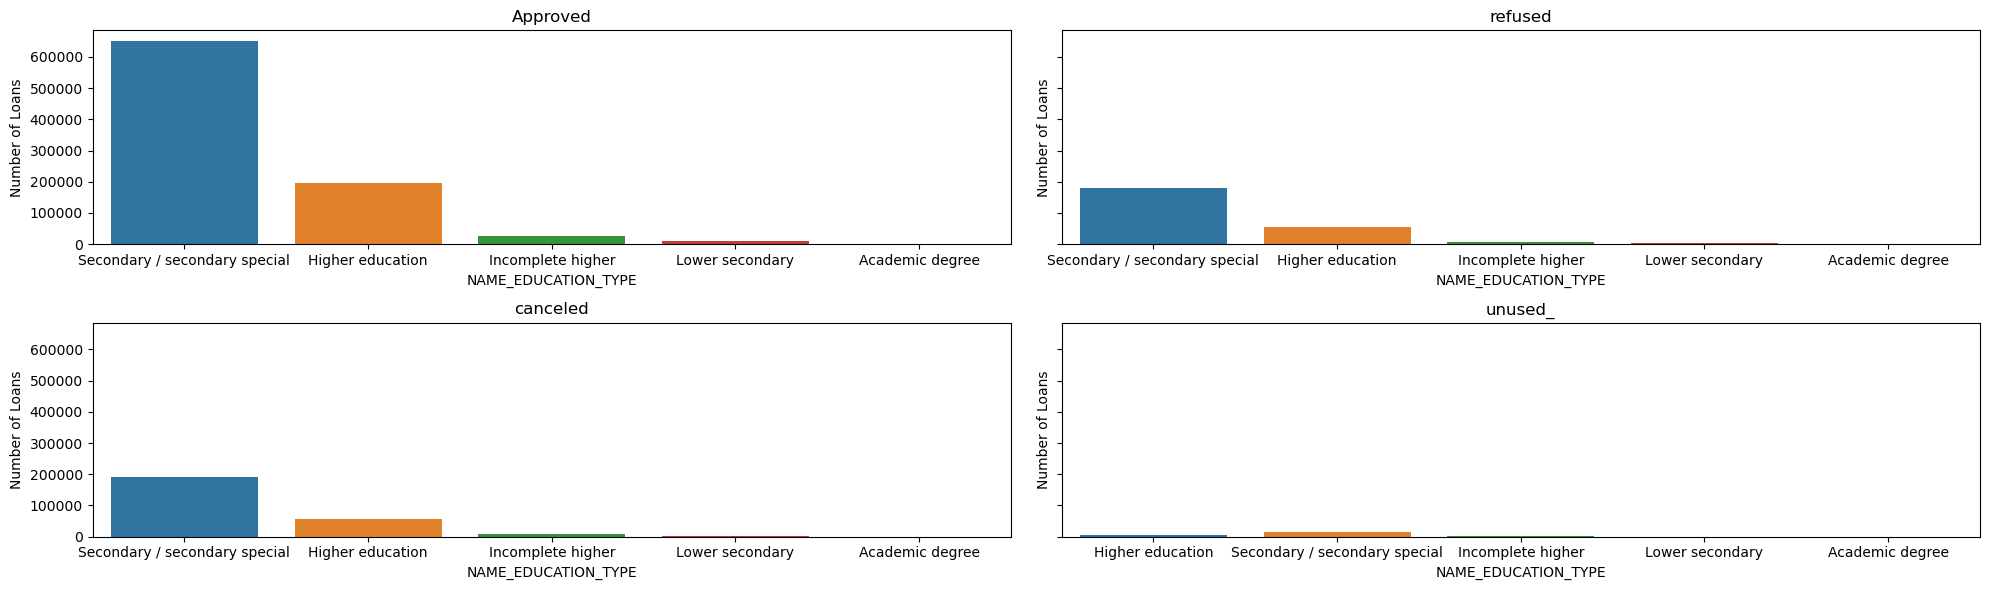

In [181]:
#annlysis on NAME_EDUCATION_TYPE
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6),sharey=True)
ax1=sns.countplot(ax=ax1,data=approved_df,x='NAME_EDUCATION_TYPE')
ax1.set_title('Approved')
ax1.set_xlabel('NAME_EDUCATION_TYPE')
ax1.set_ylabel('Number of Loans')
ax2=sns.countplot(ax=ax2,data=refused_df,x='NAME_EDUCATION_TYPE')
ax2.set_title('refused')
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Number of Loans')
ax3=sns.countplot(ax=ax3,data=canceled_df,x='NAME_EDUCATION_TYPE')
ax3.set_title('canceled')
ax3.set_xlabel('NAME_EDUCATION_TYPE')
ax3.set_ylabel('Number of Loans')
ax4=sns.countplot(ax=ax4,data=unused_df,x='NAME_EDUCATION_TYPE')
ax4.set_title('unused_')
ax4.set_xlabel('NAME_EDUCATION_TYPE')
ax4.set_ylabel('Number of Loans')
plt.tight_layout()
plt.show()

Based on the above plot we can see that most of loans were Approved to persons with education of Secondary/Secondary special.

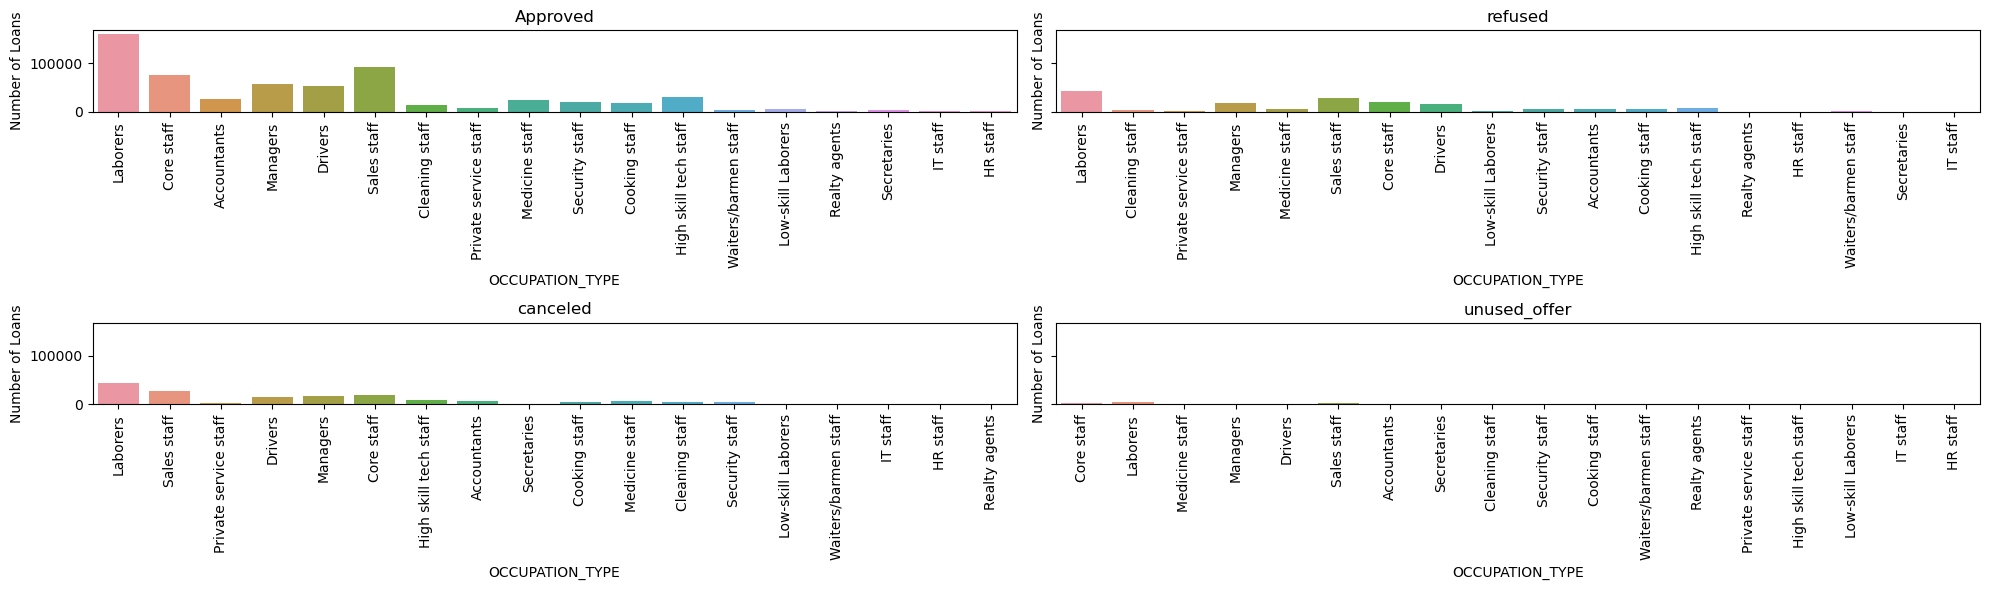

In [183]:
count_plots('OCCUPATION_TYPE')

Based on the above we can see Laborers are applying more loans and are beign approved.

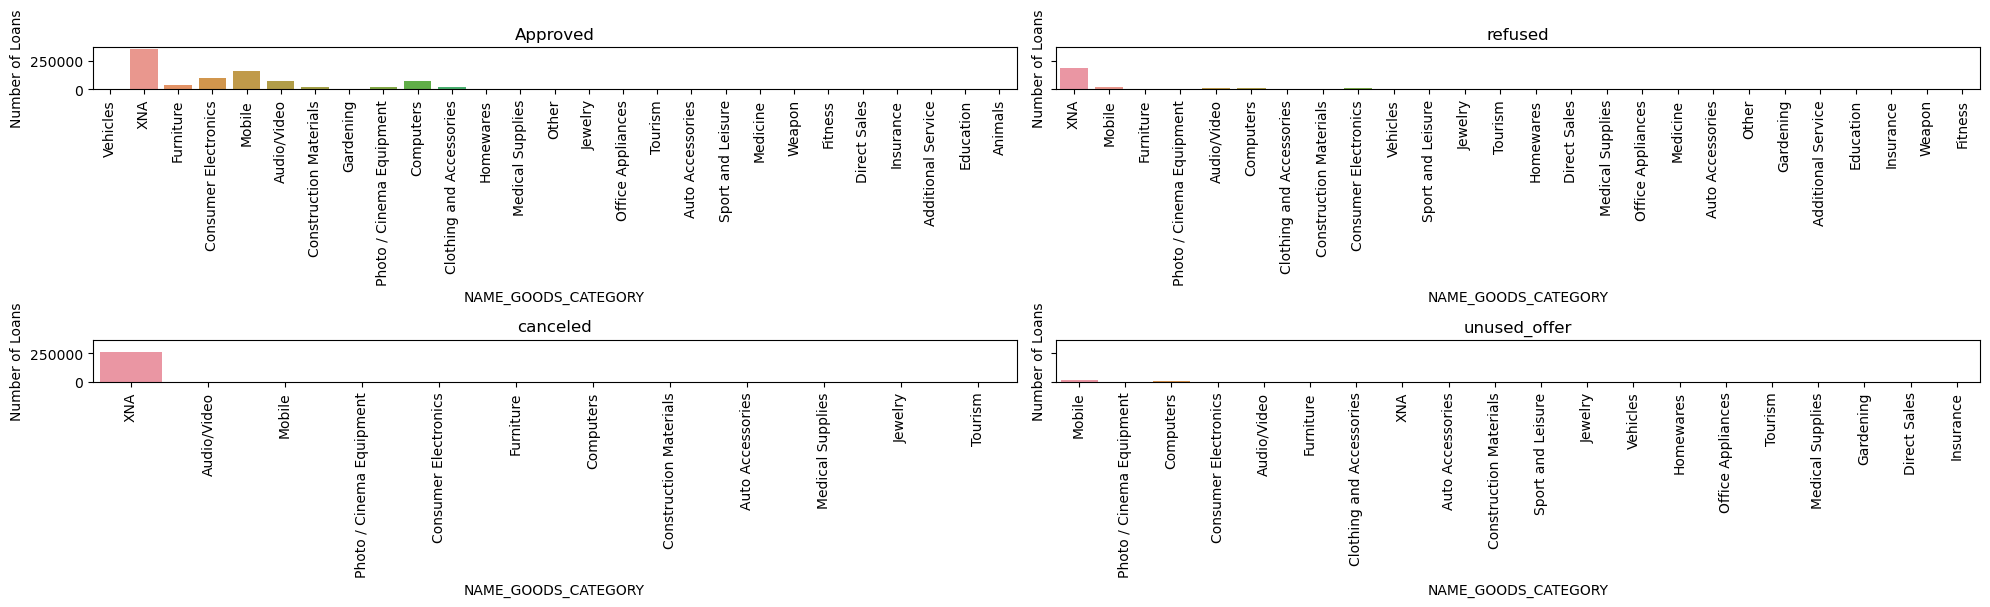

In [184]:
count_plots('NAME_GOODS_CATEGORY')

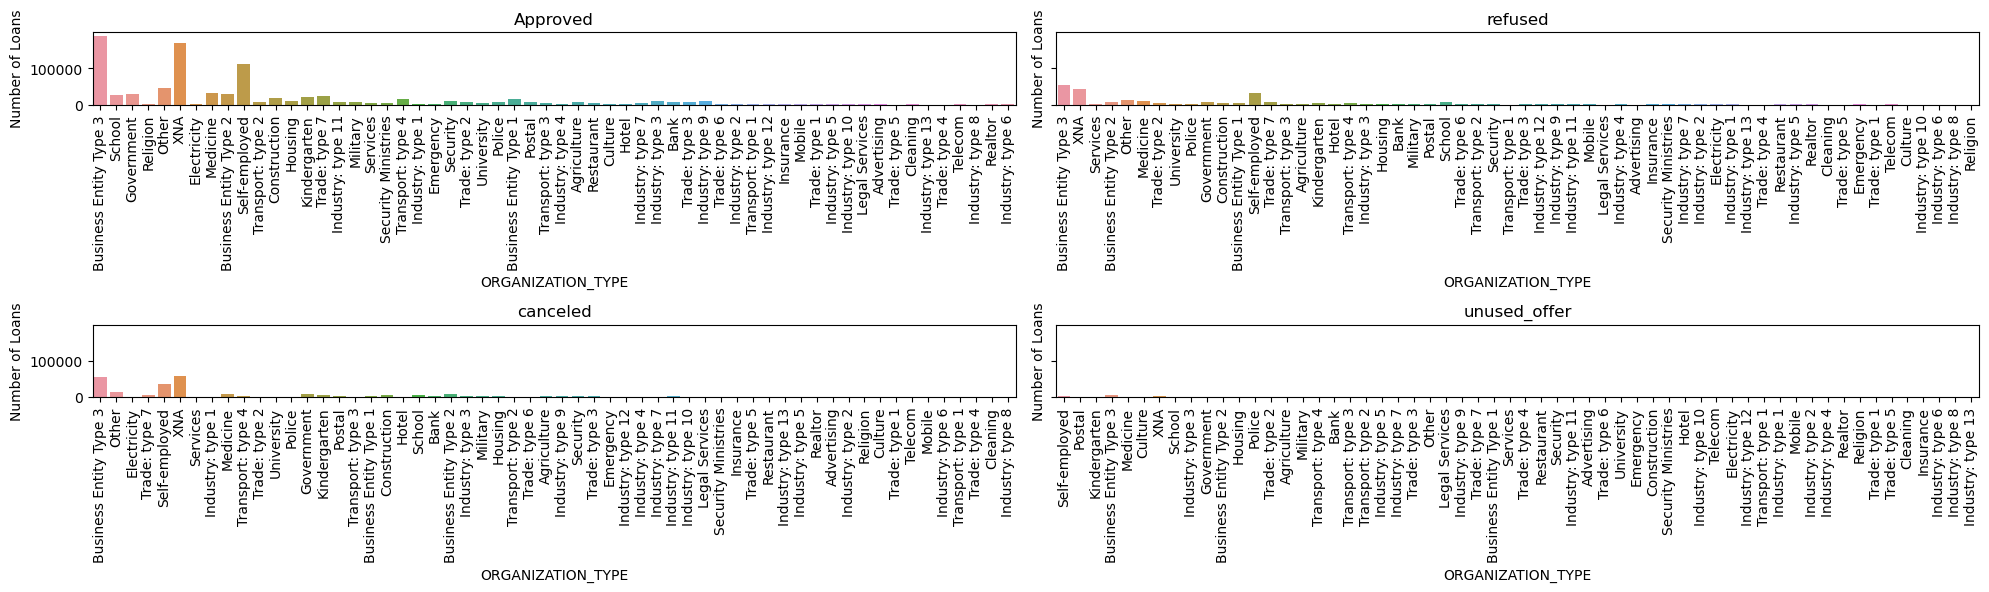

In [186]:
count_plots('ORGANIZATION_TYPE')

### Conclusion

Based on the two data set we observe that 
1. Females are with higher percentage for applying more loans.
2. Most of loans are approved to the customers working under organization type 'Business Entity type:3'
3. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
4. Loan Purpose on 'Repair' having highest number of unsuccessful repayments.
5. Housing Type 'With Parents' having least number of unsuccesful repayments.
6. Most provide loans to clients having higher education type as Secondary/ Secondary special with marital status Married. 
